In [1]:
#Set Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
#Import CSV
csvfile = "Animal-Adoptions/large.csv"

#Read CSV
pet_data = pd.read_csv(csvfile)


In [7]:
pet_data.head()

,id.1,organization_id,age,gender,size,coat,tags,name_x,description,status,...,colors.primary,attributes.spayed_neutered,attributes.house_trained,special_needs,shots_current,contact.address.city,contact.address.postcode,animal_id,organization_id.1,name_y
0,49774956,TX988,Baby,Female,Medium,Short,"['Playful', 'energetic', 'loving', 'happy', 'l...",Robin,Have you met… Robin?\n\nRobin comes from a lit...,adopted,...,Apricot / Beige,True,False,False,False,San Antonio,78209,49774956,TX988,SNIPSA Inc.
1,49763712,TX988,Young,Female,Medium,Short,[],Lulu,Lulu loves you already — and you’ve only just ...,adopted,...,Brindle,True,False,False,True,San Antonio,78209,49763712,TX988,SNIPSA Inc.
2,49763210,TX988,Young,Female,Medium,Short,[],Noche,Meet Noche!\n\nLittle Noche is a super sweet a...,adopted,...,Black,True,False,False,True,San Antonio,78209,49763210,TX988,SNIPSA Inc.
3,49761306,TX988,Young,Male,Large,Long,[],REggie,Rescued with a few other wandering big dogs fr...,adopted,...,Black,True,False,False,True,San Antonio,78209,49761306,TX988,SNIPSA Inc.
4,49696332,TX988,Young,Female,Medium,Medium,[],Gabby,Gabby is as sweet as her coat is white and wou...,adopted,...,White / Cream,True,False,False,True,San Antonio,78209,49696332,TX988,SNIPSA Inc.


In [8]:
#Total Number of Dogs
total_dogs = len(pet_data["animal_id"].unique())
print(total_dogs)


668


In [9]:
#Check for duplicates
pet_data = pet_data.drop_duplicates(subset=["animal_id"], keep ="last")
print(len(pet_data))

668


In [45]:
#Sort All Shelter Information by Gender
true_mf1 = pet_data.loc[:, "gender"]
true_mf2 = true_mf1.value_counts()
true_mf2

Female    339
Male      329
Name: gender, dtype: int64

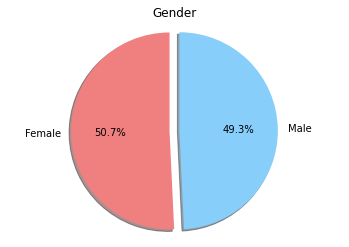

In [47]:
#Pie Chart Using Pyplot for All Shelter Information by Gender

colors = ["lightcoral","lightskyblue"]

labels = true_mf2.index
sizes = true_mf2.values
explode = (0.1,0)

#Create Pie Chart Using the Above Data

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle

plt.axis("equal")
plt.show()

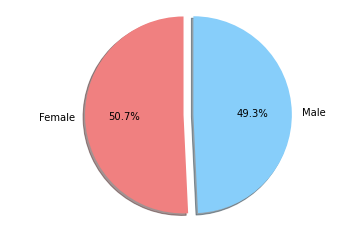

<Figure size 432x288 with 0 Axes>

In [135]:
#Pie Chart Using Pandas for All Shelter Information by Gender
colors = ["lightcoral", "lightskyblue"]
explode = [0.1, 0]
true_mf2.plot(kind="pie",shadow = True, colors=colors, explode = explode, startangle=90,figsize=(6,4), autopct='%1.1f%%')
plt.ylabel(" ")
plt.axis("equal")
plt.show()


plt.savefig("Animal-Adoptions/output_data/LargestShelter_Gender.png")

In [50]:
#Sort All Shelter Information by Dog Size
true_size1 = pet_data.loc[:, "size"]
true_size2 = true_size1.value_counts()
true_size2

Medium    399
Small     185
Large      84
Name: size, dtype: int64

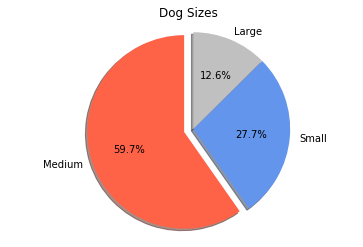

In [129]:
#Pie Chart Using Pandas for All Shelter Information by Size
colors = ["tomato","cornflowerblue","silver"]
explode = [0.1, 0,0]
true_size2.plot(kind="pie",shadow = True, colors = colors, explode = explode, startangle=90,figsize=(6,4), autopct='%1.1f%%')
plt.title("Dog Sizes")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("Animal-Adoptions/output_data/LargestShelter_Sizes.png")

plt.show()

In [104]:
true_age1 = pet_data.loc[:, "age"]
true_age2 = true_age1.value_counts()
true_age2

Baby      404
Young     229
Adult      32
Senior      3
Name: age, dtype: int64

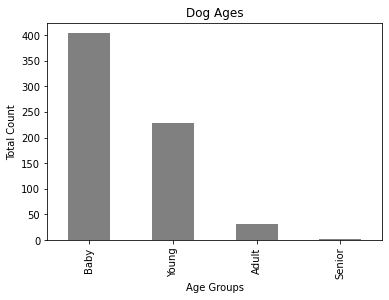

<Figure size 432x288 with 0 Axes>

In [131]:
#Pie Chart Using Pandas for All Shelter Information by Size
colors = ["tomato","cornflowerblue","silver","gold"]

y_axis = true_age2.values
x_axis = true_age2.index

#Outline the graph
true_age2.plot(kind="bar", facecolor='grey')

#Assemble the graph
plt.xticks(rotation = 90)
plt.title("Dog Ages")
plt.xlabel("Age Groups")
plt.ylabel("Total Count")
plt.show()

plt.savefig("Animal-Adoptions/output_data/LargestShelter_Ages.png")

In [133]:
# First create a dataframe grouping by the Breed Column
dog_breeds_data = pet_data.groupby("breeds.primary")

dog_breeds_count = dog_breeds_data["breeds.primary"].count()

breed_summary = pd.DataFrame({"Count": dog_breeds_count})

breed_summary.sort_values(["Count"], ascending = False)

,Count
breeds.primary,
Chihuahua,77
Labrador Retriever,68
Collie,45
Great Pyrenees,42
Dachshund,36
Hound,33
Shepherd,30
Australian Cattle Dog / Blue Heeler,29
Border Collie,29


In [63]:
dog_breeds_count.max()

breeds.primary    77
dtype: int64

In [83]:
# First create a dataframe grouping by the Breed Column
dogs_status = pet_data.groupby("status")

dogs_status_count = dogs_status["status"].size()

status_summary = pd.DataFrame({"Status": dogs_status_count})


status_summary


,Status
status,
adoptable,7
adopted,661


In [101]:
#Group by breed
breed_count = pet_data.groupby(["status","breeds.primary"]).size()

breed_status_summary = pd.DataFrame({"Count": breed_count})

breed_status_summary.sort_values(["status","Count"], ascending = False)

Count
status    breeds.primary           
adopted   Chihuahua              77
          Labrador Retriever     68
          Collie                 44
          Great Pyrenees         41
          Dachshund              36
...                             ...
adoptable Collie                  1
          Great Pyrenees          1
          Hound                   1
          Shepherd                1
          Terrier                 1

[66 rows x 1 columns]

In [20]:
#CSV Output for Breed Types by Status
output_data_file_breed_count ="/users/rebeccatast/desktop/Animal-Adoptions/breed_counts.csv"
breed_count.to_csv(output_data_file_breed_count, index_label="breeds.primary")

In [21]:
#Top 5 Breeds for Adopted and Adoptable
top_five_breeds = breed_count.sort_values(by = ["id.1","status"], ascending =[False, False])
top_five_breeds.head(25)

id.1  organization_id  age  \
status    breeds.primary                                                    
adopted   Labrador Retriever                    622              622  622   
          Chihuahua                             560              560  560   
          Terrier                               453              453  453   
          Pit Bull Terrier                      328              328  328   
          Dachshund                             292              292  292   
          Australian Cattle Dog / Blue Heeler   234              234  234   
          German Shepherd Dog                   223              223  223   
          Shepherd                              222              222  222   
adoptable Labrador Retriever                    193              193  193   
          Pit Bull Terrier                      187              187  187   
adopted   Mixed Breed                           170              170  170   
          Boxer                                 156              156  156   
          Border Collie                         125              125  125   
          Great Pyrenees                        114              114  114   
          Hound                                 114              114  114   
adoptable Shepherd                              111              111  111   
          Terrier                               109              109  109   
          American Staffordshire Terrier        107              107  107   
adopted   Great Dane                            104              104  104   
          Husky                                  94               94   94   
adoptable Chihuahua                              93               93   93   
adopted   Jack Russell Terrier                   92               92   92   
adoptable Mixed Breed                            90               90   90   
adopted   Schnauzer                              86               86   86   
          Australian Shepherd                    85               85   85   

                                               gender  size  coat  tags  \
status    breeds.primary                                                  
adopted   Labrador Retriever                      622   622   513   622   
          Chihuahua                               560   560   421   560   
          Terrier                                 453   453   284   453   
          Pit Bull Terrier                        328   328   312   328   
          Dachshund                               292   292   168   292   
          Australian Cattle Dog / Blue Heeler     234   234   206   234   
          German Shepherd Dog                     223   223   196   223   
          Shepherd                                222   222   196   222   
adoptable Labrador Retriever                      193   193    35   193   
          Pit Bull Terrier                        187   187    31   187   
adopted   Mixed Breed                             170   170   133   170   
          Boxer                                   156   156   134   156   
          Border Collie                           125   125   112   125   
          Great Pyrenees                          114   114   106   114   
          Hound                                   114   114   102   114   
adoptable Shepherd                                111   111    16   111   
          Terrier                                 109   109    37   109   
          American Staffordshire Terrier          107   107     7   107   
adopted   Great Dane                              104   104    43   104   
          Husky                                    94    94    75    94   
adoptable Chihuahua                                93    93    21    93   
adopted   Jack Russell Terrier                     92    92    75    92   
adoptable Mixed Breed                              90    90    21    90   
adopted   Schnauzer                                86    86    56    86   
          Austral

In [22]:
# Count of Spayed vs Neutered
fixed_status = pet_shelter.groupby("attributes.spayed_neutered")

fixed_status_count = pd.DataFrame(fixed_status["attributes.spayed_neutered"].count())

print(fixed_status_count)

                            attributes.spayed_neutered
attributes.spayed_neutered                            
False                                             1620
True                                              5858


In [117]:
#Fixed by Status
group_fixed = pet_data.groupby(["status","attributes.spayed_neutered"]).size()


group_fixed_summary = pd.DataFrame({"Count": group_fixed})

group_fixed_summary.sort_values(["status","Count"], ascending = False)

Count
status    attributes.spayed_neutered       
adopted   True                          657
          False                           4
adoptable True                            7

In [120]:
true_spayed1 = pet_data.loc[:, "attributes.spayed_neutered"]
true_spayed2 = true_spayed1.value_counts()
true_spayed2

True     664
False      4
Name: attributes.spayed_neutered, dtype: int64

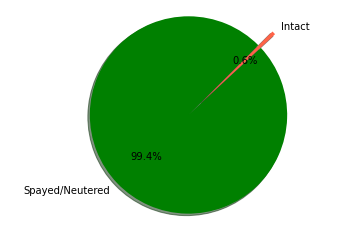

<Figure size 432x288 with 0 Axes>

In [141]:
colors = ["green", "tomato"]
explode = [0, 0.2]

labels = ['Spayed/Neutered', 'Intact']
true_spayed2.plot(kind="pie",shadow = True, colors=colors, labels = labels, explode = explode, startangle=45,figsize=(6,4), autopct='%1.1f%%')
#plt.title("Spayed/Neuter vs Intact")
plt.ylabel(" ")
plt.axis("equal")
plt.show()


plt.savefig("Animal-Adoptions/output_data/LargestShelter_Fixed.png")

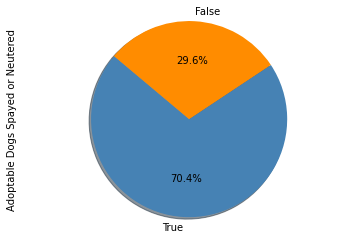

In [24]:



#Pie Chart Using Pyplot Fixed Adoptable
Spayed_Neutered = ["True", "False"]
numbers = [1165,489]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Adoptable Dogs Spayed or Neutered")
plt.pie(numbers, explode=explode, labels=Spayed_Neutered, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

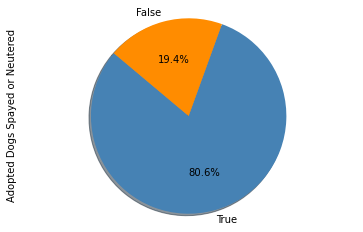

In [25]:
#Pie Chart Using Pyplot Fixed Adopted

Spayed_Neutered = ["True", "False"]
numbers = [4693,1131]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Adopted Dogs Spayed or Neutered")
plt.pie(numbers, explode=explode, labels=Spayed_Neutered, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [26]:
#Age Overall
SA_Shelter.groupby("age").size()  

age
Adult     2902
Baby      2140
Senior     402
Young     2034
dtype: int64

In [27]:
#Age by Status
group_age = SA_Shelter.groupby(["age","status"]).size()
print(group_age)

age     status   
Adult   adoptable     899
        adopted      2003
Baby    adoptable     150
        adopted      1990
Senior  adoptable     140
        adopted       262
Young   adoptable     465
        adopted      1569
dtype: int64


In [35]:
#Age by Status Bar Graphs
status_age = pd.DataFrame({
    "Adoptable":[150, 465, 899, 140],
    "Adopted":[1990, 1569, 2003, 262]
    }, 
    index=["Baby", "Young", "Adult", "Senior"]
)
status_age.head()

,Adoptable,Adopted
Baby,150,1990
Young,465,1569
Adult,899,2003
Senior,140,262


Text(0, 0.5, 'Number of Dogs')

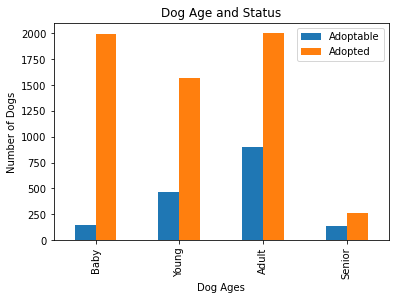

In [36]:
plotdata = pd.DataFrame({
    "Adoptable":[150, 465, 899, 140],
    "Adopted":[1990, 1569, 2003, 262]
    },  
    index=["Baby", "Young", "Adult", "Senior"]
)
plotdata.plot(kind="bar")
plt.title("Dog Age and Status")
plt.xlabel("Dog Ages")
plt.ylabel("Number of Dogs")

In [28]:
#Size Overall
SA_Shelter.groupby("size").size()


size
Extra Large     113
Large          1320
Medium         3742
Small          2303
dtype: int64

In [33]:
#Size by Status
group_size_status = SA_Shelter.groupby(["size", "status"]).size()
print(group_size_status)

size         status   
Extra Large  adoptable      26
             adopted        87
Large        adoptable     405
             adopted       915
Medium       adoptable     852
             adopted      2890
Small        adoptable     371
             adopted      1932
dtype: int64


In [34]:
status_size = pd.DataFrame({
    "Adoptable":[26, 405, 852, 371],
    "Adopted":[87, 915, 2890, 1932]
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
status_size.head()

,Adoptable,Adopted
Extra Large,26,87
Large,405,915
Medium,852,2890
Small,371,1932


Text(0, 0.5, 'Number of Dogs')

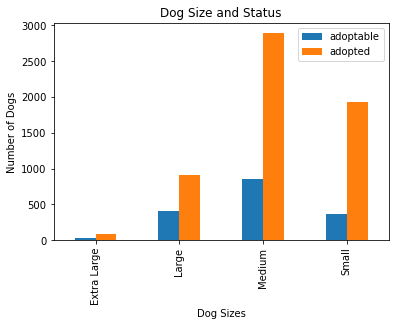

In [32]:
plotdata = pd.DataFrame({
    "adoptable":[26, 405, 852, 371],
    "adopted":[87, 915, 2890, 1932]
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
plotdata.plot(kind="bar")
plt.title("Dog Size and Status")
plt.xlabel("Dog Sizes")
plt.ylabel("Number of Dogs")